In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline
ipos = pd.read_excel(r'./ipo_data_.xls')

In [9]:
ipos

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,NaN
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,NaN
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,NaN
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,NaN
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08 00:00:00,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,NaN
3629,2000-12-08 00:00:00,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,NaN
3630,2000-12-11 00:00:00,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,NaN
3631,2000-12-12 00:00:00,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,NaN


In [10]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trade Date                3633 non-null   object 
 1   Issuer                    3633 non-null   object 
 2   Symbol                    3633 non-null   object 
 3   Lead/Joint-Lead Managers  3633 non-null   object 
 4   Offer Price               3633 non-null   float64
 5   Opening Price             3633 non-null   float64
 6   1st Day Close             3633 non-null   float64
 7   1st Day % Px Chng         3632 non-null   float64
 8   $ Change Opening          3633 non-null   float64
 9   $ Change Close            3633 non-null   float64
 10  Star Ratings              3633 non-null   object 
 11  Performed                 407 non-null    object 
dtypes: float64(6), object(6)
memory usage: 340.7+ KB


In [11]:
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00 present at position 836

In [12]:
ipos[ipos['Trade Date'] == '11/120']

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
1767,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.0,17.0,18.4,0.15,1.0,2.4,1,NaN


In [13]:
ipos.loc[1767, 'Trade Date'] = '2012-11-20'

In [14]:
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date'])

In [15]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trade Date                3633 non-null   datetime64[ns]
 1   Issuer                    3633 non-null   object        
 2   Symbol                    3633 non-null   object        
 3   Lead/Joint-Lead Managers  3633 non-null   object        
 4   Offer Price               3633 non-null   float64       
 5   Opening Price             3633 non-null   float64       
 6   1st Day Close             3633 non-null   float64       
 7   1st Day % Px Chng         3632 non-null   float64       
 8   $ Change Opening          3633 non-null   float64       
 9   $ Change Close            3633 non-null   float64       
 10  Star Ratings              3633 non-null   object        
 11  Performed                 407 non-null    object        
dtypes: datetime64[ns](1)

In [16]:
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

ValueError: invalid literal for int() with base 10: 'NC'

In [19]:
ipos.replace('N/C', 0, inplace=True)

In [20]:
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [21]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trade Date                3633 non-null   datetime64[ns]
 1   Issuer                    3633 non-null   object        
 2   Symbol                    3633 non-null   object        
 3   Lead/Joint-Lead Managers  3633 non-null   object        
 4   Offer Price               3633 non-null   float64       
 5   Opening Price             3633 non-null   float64       
 6   1st Day Close             3633 non-null   float64       
 7   1st Day % Px Chng         3632 non-null   float64       
 8   $ Change Opening          3633 non-null   float64       
 9   $ Change Close            3633 non-null   float64       
 10  Star Ratings              3633 non-null   int32         
 11  Performed                 407 non-null    object        
dtypes: datetime64[ns](1)

<Axes: title={'center': '1st Day % Px Chng'}, xlabel='Trade Date'>

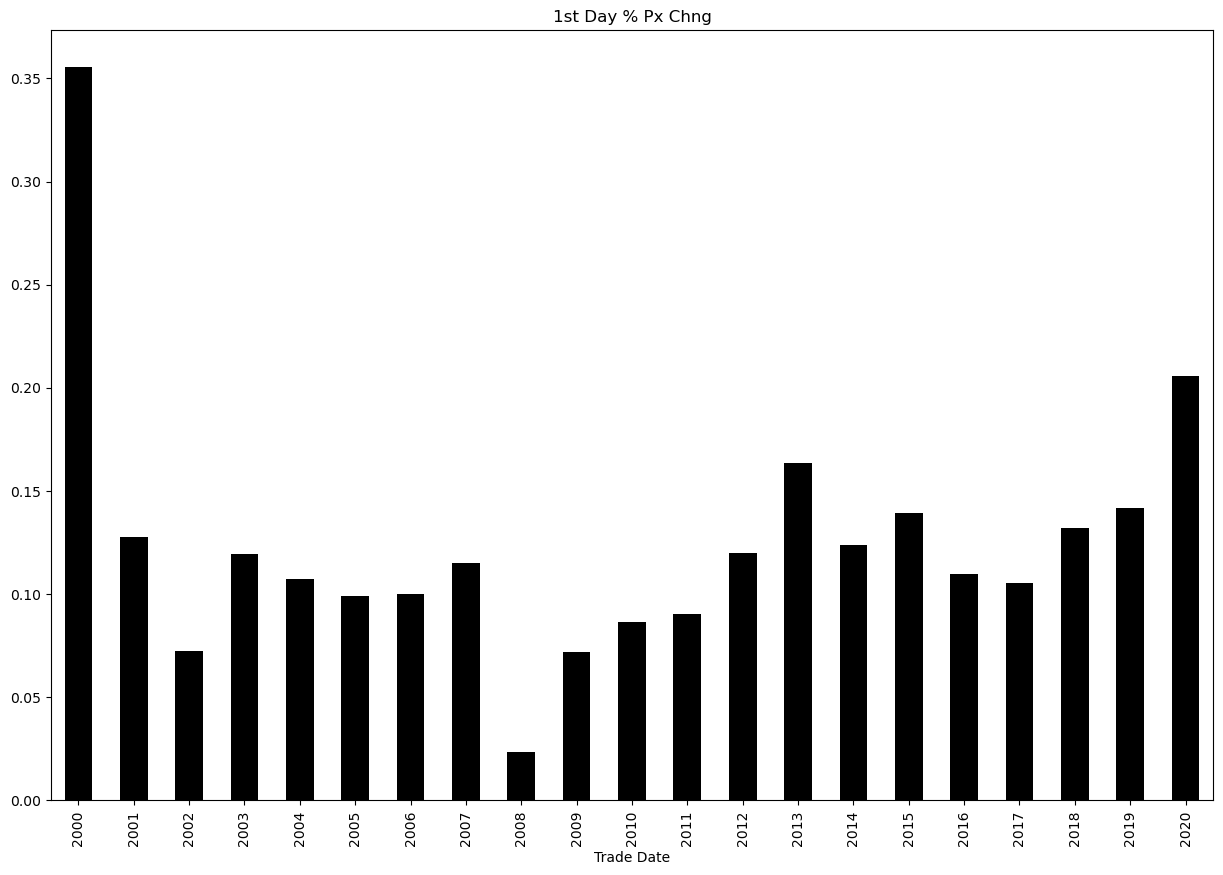

In [29]:
ipos.groupby(ipos['Trade Date'].dt.year)['1st Day % Px Chng '].mean().plot(kind='bar', figsize=(15,10), color ='k', title='1st Day % Px Chng' )

<Axes: title={'center': '1st Day % Px Chng'}, xlabel='Trade Date'>

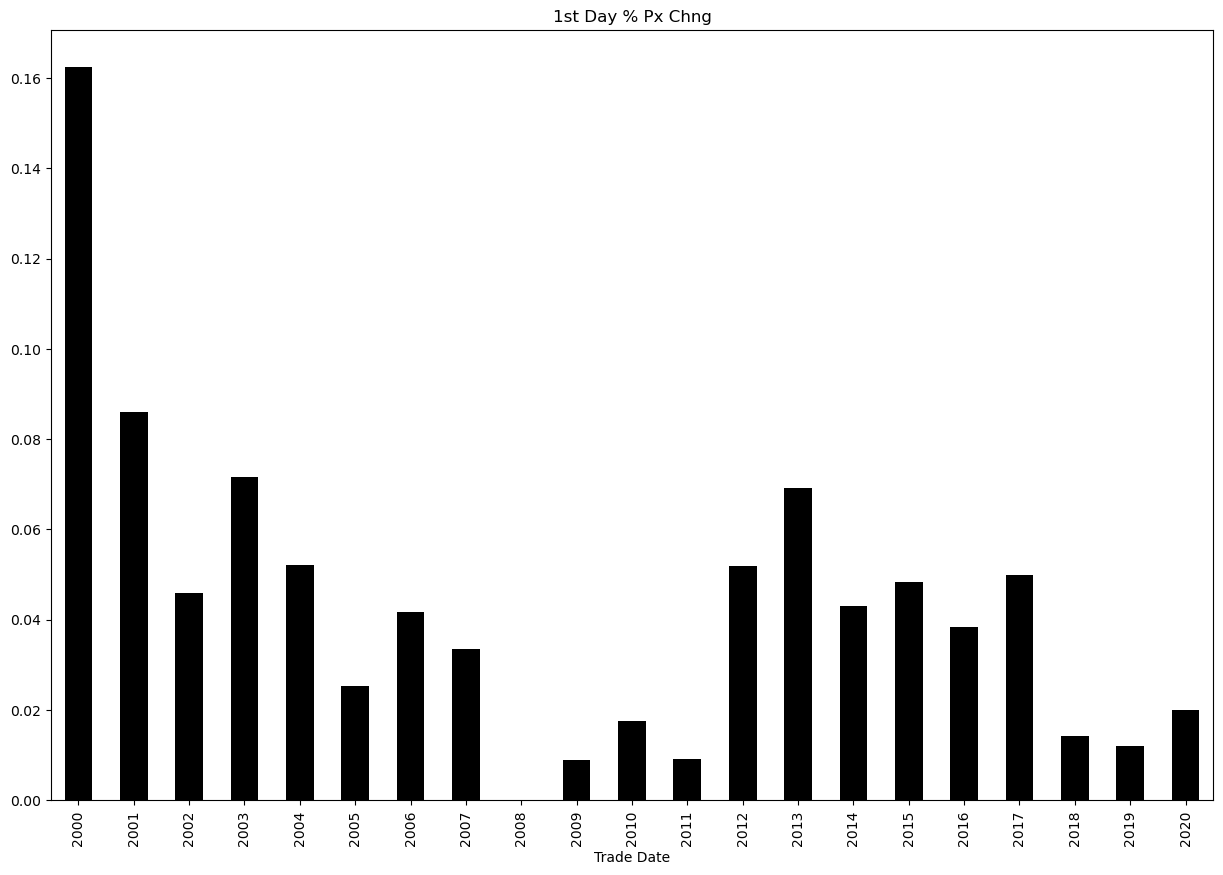

In [30]:
ipos.groupby(ipos['Trade Date'].dt.year)['1st Day % Px Chng '].median().plot(kind='bar', figsize=(15,10), color ='k', title='1st Day % Px Chng' )

In [31]:
ipos['1st Day % Px Chng '].describe()

count    3632.000000
mean        0.135870
std         0.285964
min        -0.410833
25%         0.000000
50%         0.038462
75%         0.195698
max         3.538519
Name: 1st Day % Px Chng , dtype: float64

<Axes: >

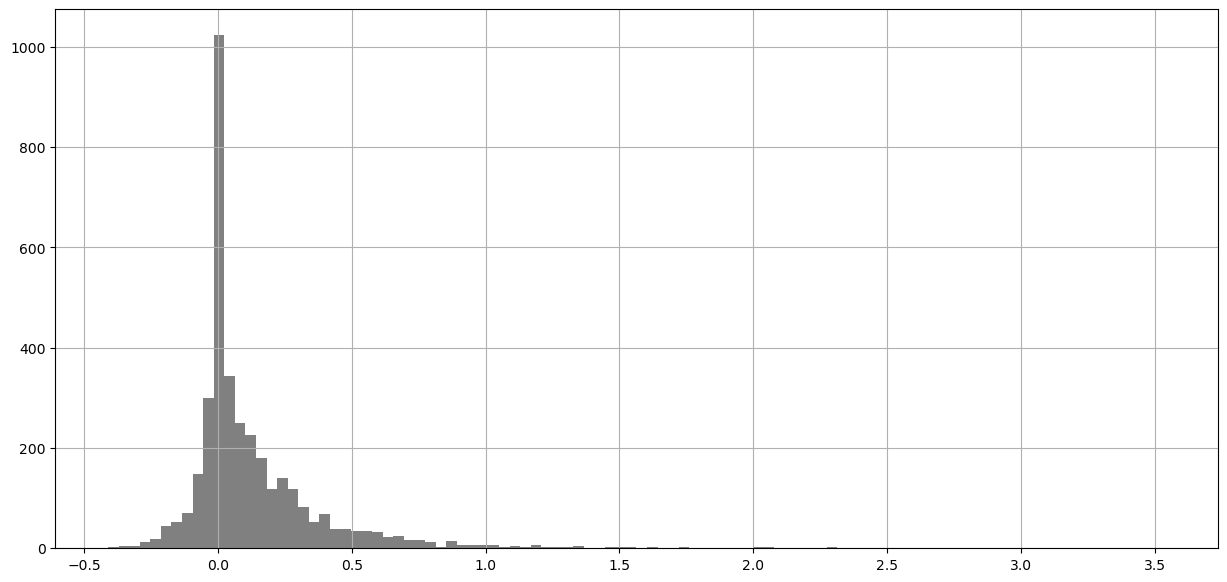

In [32]:
ipos['1st Day % Px Chng '].hist(figsize=(15, 7), bins=100, color='grey')

In [43]:
ipos['$ Chg Open to Close'] = ipos['$ Change Close'] - ipos['$ Change Opening']

In [44]:
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close'] / ipos['Opening Price']) * 100

In [45]:
ipos['% Chg Open to Close'].describe()

count    3633.000000
mean        1.351040
std        11.699933
min       -49.281222
25%        -2.887139
50%         0.000000
75%         3.829787
max       217.365269
Name: % Chg Open to Close, dtype: float64

In [38]:
ipos[ipos['% Chg Open to Close'] <-98]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
2727,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,0.036667,6.22,0.22,1,NaN,-6.0,-98.522167


In [50]:
ipos[ipos['% Chg Open to Close'] >200]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
424,2019-12-19,Monopar Therapeutics,MNPR,JonesTrading,8.0,8.35,26.5,2.3125,0.35,18.5,1,NaN,18.15,217.365269


In [40]:
ipos.loc[2727, '$ Change Opening'] = .09

In [42]:
ipos[ipos['% Chg Open to Close'] < -80]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
2727,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,0.036667,0.09,0.22,1,NaN,-6.0,-98.522167


In [51]:
ipos['$ Chg Open to Close'].describe()

count    3633.000000
mean        0.258785
std         2.409739
min       -24.230000
25%        -0.450000
50%         0.000000
75%         0.600000
max        56.540000
Name: $ Chg Open to Close, dtype: float64

<Axes: >

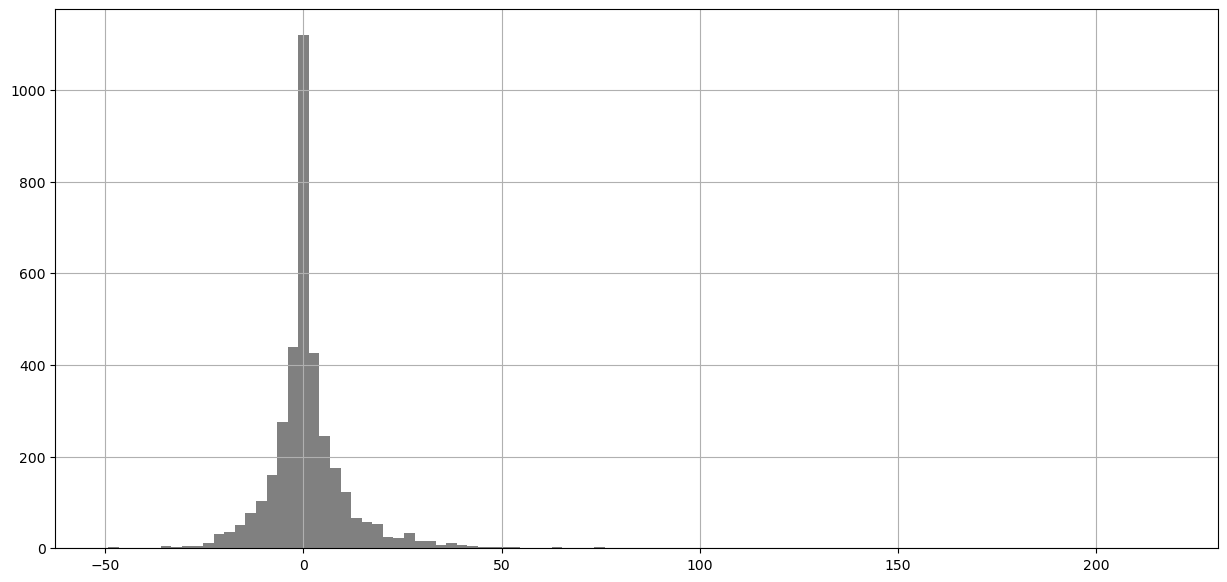

In [52]:
ipos['% Chg Open to Close'].hist(figsize=(15, 7), bins=100, color='grey')

In [53]:
ipos[(ipos['Trade Date'] >= '2015-01-01') & (ipos['$ Chg Open to Close'] > 0)]['$ Chg Open to Close'].describe()

count    501.000000
mean       1.624503
std        2.858726
min        0.010000
25%        0.120000
50%        0.640000
75%        1.780000
max       20.590000
Name: $ Chg Open to Close, dtype: float64

In [54]:
sp = pd.read_csv(r'./spy.csv')

In [55]:
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2016-02-24,192.320007,193.529999,189.320007,193.199997,148044600,193.199997,0.879990,0.000000,0.000000,...,0,1,0,1,1,1,0,0,1,0
1546,2016-02-25,193.729996,195.550003,192.830002,195.539993,107512400,195.539993,1.809997,0.529999,0.274327,...,0,0,0,0,0,1,0,0,0,1
1547,2016-02-26,196.570007,196.679993,194.899994,195.089996,122978000,195.089996,-1.480011,1.030014,0.526754,...,1,1,0,1,1,1,0,0,0,0
1548,2016-02-29,195.110001,196.229996,193.330002,193.350006,116294300,193.350006,-1.759995,0.020005,0.010254,...,1,0,1,1,1,1,1,1,0,0


In [57]:
def get_week_chg(ipo_dt):
  try:
    day_ago_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0] - 1
    week_ago_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0] - 8
    chg = (sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close']) / (sp.iloc[week_ago_idx]['Close'])
    return chg * 100
  except:
    print("Error", ipo_dt.date())

ipos['SP Week Change'] = ipos['Trade Date'].map(get_week_chg)

Error 2020-01-17
Error 2020-01-17
Error 2020-01-17
Error 2020-01-17
Error 2020-01-24
Error 2020-01-24
Error 2020-01-28
Error 2020-01-29
Error 2020-01-29
Error 2020-01-31
Error 2020-01-31
Error 2020-01-31
Error 2020-02-04
Error 2020-02-06
Error 2020-02-06
Error 2020-02-06
Error 2020-02-06
Error 2020-02-07
Error 2020-02-07
Error 2020-02-07
Error 2020-02-11
Error 2020-02-11
Error 2020-02-12
Error 2020-02-13
Error 2020-02-13
Error 2020-02-13
Error 2020-02-14
Error 2020-02-14
Error 2020-02-20
Error 2020-02-21
Error 2020-02-24
Error 2020-02-28
Error 2020-03-03
Error 2020-03-06
Error 2020-03-06
Error 2020-03-11
Error 2020-03-12
Error 2020-04-01
Error 2020-04-03
Error 2020-04-08
Error 2020-04-22
Error 2020-04-24
Error 2020-04-24
Error 2020-04-24
Error 2020-04-28
Error 2020-04-30
Error 2020-05-01
Error 2020-05-01
Error 2020-05-05
Error 2020-05-06
Error 2020-05-06
Error 2020-05-08
Error 2020-05-08
Error 2020-05-08
Error 2020-05-14
Error 2020-05-14
Error 2020-05-15
Error 2020-05-15
Error 2020-05-

In [58]:
ipos[ipos['Trade Date'] == '2020-02-06']

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
13,2020-02-06,Beam Therapeutics,BEAM,J.P. Morgan/ Jefferies/ Barclays,17.0,24.0,18.75,0.102941,7.0,1.75,3,NaN,-5.25,-21.875000,NaN
14,2020-02-06,Casper Sleep,CSPR,Morgan Stanley/ Goldman Sachs/ Jefferies,12.0,14.5,13.50,0.125000,2.5,1.50,1,NaN,-1.00,-6.896552,NaN
15,2020-02-06,PPD,PPD,Barclays/ J.P. Morgan/ Morgan Stanley/ Goldman...,27.0,31.0,30.00,0.111111,4.0,3.00,3,NaN,-1.00,-3.225806,NaN
16,2020-02-06,Schrodinger,SDGR,Morgan Stanley/ BofA Securities/ Jefferies/ BM...,17.0,26.0,28.64,0.684706,9.0,11.64,2,NaN,2.64,10.153846,NaN
